# Einleitung zum Versuch "Dilution Correction"

- Understand Ideal Gas Law: https://youtu.be/BxUS1K7xu30?si=f3rDpXa9sT9PRdz9 (activate German subtitles if needed)
- Partial Pressure and water pressure: https://youtu.be/JbqtqCunYzA?si=UgNx84xJpQUcYKGu
- Annahme, dass Temperatur und Druck bereits Sensorintern korregiert sind. "Ideal Gas Law"
- Sensor Output ist ein unkalibriertes feuchtes Sensorsignal 
- Ziel ist es zu verstehen wieso wir ein trockenes Sensorsignal brauchen und wie wir dies berechnen können "dry air mole fraction"

In [ ]:
import polars as pl
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory to the system path
PROJECT_PATH = os.path.abspath(os.path.join(".."))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from utils.plot_dataframes import plot_column, plot_columns, plot_column_difference

In [85]:
df_p = pl.read_parquet("../data/1_Dilution_Correction/Reference_Picarro_G2401.parquet")
df_s = pl.read_parquet("../data/1_Dilution_Correction/Sensor_GMP343_Measurement.parquet")

In [ ]:
#plot_column(df_s, "datetime", "gmp343_temperature")
#plot_column(df_s, "datetime", "bme280_pressure")

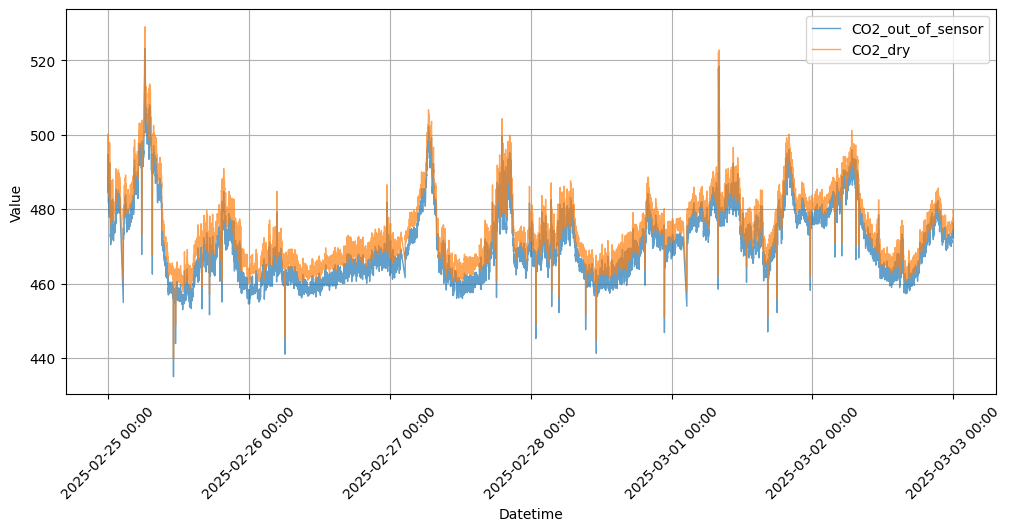

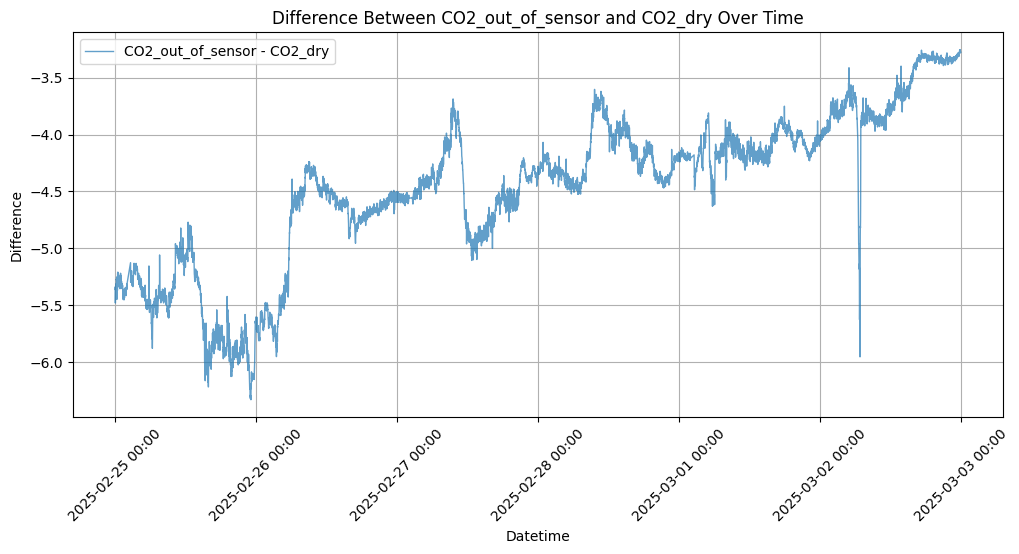

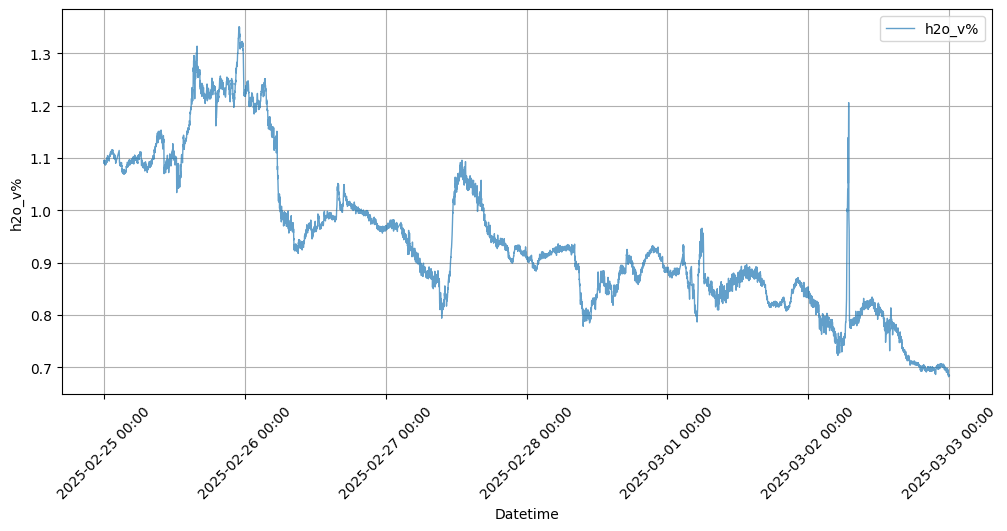

In [86]:
plot_columns(df_s, "datetime", ["CO2_out_of_sensor", "CO2_dry"])
plot_column_difference(df_s, "datetime", ["CO2_out_of_sensor", "CO2_dry"])
plot_column(df_s, "datetime", "h2o_v%")

- Wie groß sind die Unterschiede zwischen Messung in trockener und feuchter Luft?
- Was ist relative und absolute Luftfeuchtigkeit?
- Welche Messgrößen brauchen wir zur Umrechnung und wo werden diese gemessen?
- Wieso brauchen wir Annäherungen?
- Wieso ist das trockene Sensorsignal != Referenz Signal

# Relative und Absolute Luftfeuchtigkeit

# Übung: Relative und Absolute Luftfeuchtigkeit

In dieser Übung lernt ihr den Unterschied zwischen absoluter und relativer Luftfeuchtigkeit kennen und berechnet, wie sich bei konstanter absoluter Luftfeuchtigkeit die relative Luftfeuchtigkeit bei unterschiedlichen Temperaturen verändert.

---

## Hintergrund

### Absolute Luftfeuchtigkeit
Die absolute Luftfeuchtigkeit gibt an, wie viel Wasserdampf (in Gramm) in einem Kubikmeter Luft enthalten ist (g/m³). Sie misst die Masse des Wasserdampfs in einem bestimmten Luftvolumen.

### Relative Luftfeuchtigkeit
Die relative Luftfeuchtigkeit (RH) ist das Verhältnis des aktuellen Dampfdrucks $e$ zum Sättigungsdampfdruck $e_s$ bei einer bestimmten Temperatur, ausgedrückt in Prozent:

$$
RH = \frac{e}{e_s} \times 100 \%
$$

Da der Sättigungsdampfdruck $e_s$ mit steigender Temperatur zunimmt, verändert sich bei konstanter absoluter Luftfeuchtigkeit auch die relative Luftfeuchtigkeit.

---

## Zusammenhang zwischen absoluter und relativer Luftfeuchtigkeit

Um den tatsächlichen Dampfdruck $e$ aus der absoluten Luftfeuchtigkeit $AH$ (in g/m³) zu berechnen, kann folgende Beziehung herangezogen werden:

$$
e = \frac{AH \times (T + 273.15)}{216.7}
$$

Hierbei ist:
- $T$ die Temperatur in °C,
- $e$ der Dampfdruck in hPa.

Der Sättigungsdampfdruck $e_s$ wird häufig mit der Tetens-Formel approximiert:

$$
e_s(T) = 6.112 \times \exp\left(\frac{17.67 \times T}{T + 243.5}\right)
$$

---

## Aufgabenstellung

Gegeben sei eine konstante absolute Luftfeuchtigkeit, z. B. $AH = 10 \, \text{g/m}^3$. Berechnet in Python für einen Temperaturbereich (z. B. von 0 °C bis 40 °C) die relative Luftfeuchtigkeit. Dabei soll für jede Temperatur:

1. Der tatsächliche Dampfdruck $e$ aus der absoluten Luftfeuchtigkeit berechnet werden.
2. Der Sättigungsdampfdruck $e_s$ mithilfe der Tetens-Formel berechnet werden.
3. Die relative Luftfeuchtigkeit $RH$ als Verhältnis $\frac{e}{e_s}$ in Prozent bestimmt werden.

In [ ]:
# Wichtige Konstanten
T0 = 273.15  # T0: float = The 0 C temperature in K
TC = 647.096  # TC: float = The critical point temperature of water
PC = 22.064e6  # PC: float = The critical point pressure of water
P0 = 1013.25e2  # P0: float = Reference pressure at sea level

# Praktische Übung 1

Implementiere die Tetens Formel in Python

Nützliche Funktionen:

3 + (1/2) = 3.5

$\text{2}^3$ = 2**3

$\text{e}^1$ = np.exp(1)

In [ ]:
# Funktion zur Berechnung des Sättigungsdampfdrucks e_s (in hPa) mittels Tetens-Formel
def saturation_vapor_pressure(T):
    
    return e_s 

In [ ]:
# Konstante absolute Luftfeuchtigkeit (g/m³)
AH = 10.0

# Temperaturbereich in °C (z. B. 0°C bis 40°C)
temperatures = np.linspace(0, 40, 100)

# Funktion zur Berechnung des tatsächlichen Dampfdrucks e (in hPa)
def actual_vapor_pressure(AH, T):
    return (AH * (T + T0)) / 216.7

# Berechnung von e, e_s und der relativen Luftfeuchtigkeit RH
e = actual_vapor_pressure(AH, temperatures)
e_s = saturation_vapor_pressure(temperatures)  
RH = (e / e_s) * 100  # relative Luftfeuchtigkeit in Prozent

# Ausgabe einiger Ergebnisse
for T, rh in zip(temperatures[::10], RH[::10]):  # alle 10. Werte ausgeben
    print(f"Temperatur: {T:.1f} °C, Relative Luftfeuchtigkeit: {rh:.1f} %")

# Plotten der Ergebnisse
plt.figure(figsize=(8, 5))
plt.plot(temperatures, RH, label='Relative Luftfeuchtigkeit')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Relative Luftfeuchtigkeit (%)')
plt.title('Relative Luftfeuchtigkeit bei konstanter absoluter Luftfeuchtigkeit')
plt.grid(True)
plt.legend()
plt.show()

Fragen:

- Was bedeutet es, wenn die Luftfeuchtigkeit über 100% ist?
- Was versteht man unter dem Taupunkt (dew point)?

## Alternative Methode: Wagner-Gleichung zur Berechnung des Sättigungsdampfdrucks

Anstelle der Tetens-Formel kann zur Berechnung des Sättigungsdampfdrucks von Wasser auch die Wagner-Gleichung verwendet werden. Diese Methode bietet eine präzisere Näherung, insbesondere über einen breiteren Temperaturbereich.

### Formulierung der Wagner-Gleichung

Die Wagner-Gleichung lautet:

$$
\ln\left(\frac{P}{P_C}\right) = \frac{T_C}{T} \left( c_1 \theta + c_2 \theta^{1.5} + c_3 \theta^3 + c_4 \theta^{3.5} + c_5 \theta^4 + c_6 \theta^{7.5} \right)
$$

wobei

$$
\theta = 1 - \frac{T}{T_C}
$$

und die Parameter definiert sind als:

- $T_C$: Kritische Temperatur von Wasser (z. B. $T_C = 647.096\,\text{K}$)
- $P_C$: Kritischer Druck von Wasser (z. B. $P_C = 22064000\,\text{Pa}$)
- $c_1 = -7.85951783$
- $c_2 = 1.84408259$
- $c_3 = -11.7866497$
- $c_4 = 22.6807411$
- $c_5 = -15.9618719$
- $c_6 = 1.80122502$

Mit dieser Gleichung kann der Sättigungsdampfdruck $P$ (auch $e_s$ genannt) bei einer gegebenen Temperatur $T$ in Kelvin berechnet werden.

# Praktische Übung 2

Implementiere die Wagner Gleichung in Python

In [ ]:
# Koeffizienten der Wagner-Gleichung
c1 = -7.85951783
c2 = 1.84408259
c3 = -11.7866497
c4 = 22.6807411
c5 = -15.9618719
c6 = 1.80122502

def saturation_vapor_pressure_wagner(T):
    """
    Berechnet den Sättigungsdampfdruck von Wasser (in Pascal) bei gegebener Temperatur T in Kelvin
    mithilfe der Wagner-Gleichung.
    """
    # Umwandlung in Kelvin
    
    # Berechnung Theta
    
    # Berechnung des natürlichen Logarithmus des Verhältnisses P/P_C
    
    # Berechnung des Sättigungsdampfdrucks P
    
    return P

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Konstante absolute Luftfeuchtigkeit (g/m³)
AH = 10.0

# Temperaturbereich in °C (z. B. 0°C bis 40°C)
temperatures = np.linspace(0, 40, 100)

# Funktion zur Berechnung des tatsächlichen Dampfdrucks e (in hPa)
def actual_vapor_pressure(AH, T):
    return (AH * (T + T0)) / 216.7

# Berechnung von e, e_s und der relativen Luftfeuchtigkeit RH
e = actual_vapor_pressure(AH, temperatures)
e_s = saturation_vapor_pressure_wagner(temperatures)  # Umwandlung in Kelvin für die Wagner-Gleichung
RH = (e / e_s) * 100  # relative Luftfeuchtigkeit in Prozent

# Ausgabe einiger Ergebnisse
for T, rh in zip(temperatures[::10], RH[::10]):  # alle 10. Werte ausgeben
    print(f"Temperatur: {T:.1f} °C, Relative Luftfeuchtigkeit: {rh:.1f} %")

# Plotten der Ergebnisse
plt.figure(figsize=(8, 5))
plt.plot(temperatures, RH, label='Relative Luftfeuchtigkeit')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Relative Luftfeuchtigkeit (%)')
plt.title('Relative Luftfeuchtigkeit bei konstanter absoluter Luftfeuchtigkeit')
plt.grid(True)
plt.legend()
plt.show()

Fragen

- Wie unterscheiden sich die Ergebnisse von den Annäherungen durch Tetens und Wagner?
- Was bedeutet es für die absolute Luftfeuchtigkeit, wenn man bei die gleiche relative Luftfeuchtigkeit bei unterschiedlichen Temperaturen misst?

# Kurze Erklärung des Taupunkts

Der **Taupunkt** ist die Temperatur, bei der die in der Luft enthaltene Wasserdampfmenge so hoch ist, dass die Luft bei weiterer Abkühlung gesättigt wird (d.h. eine relative Luftfeuchtigkeit von 100 % erreicht). Bei Erreichen des Taupunkts beginnt der Wasserdampf zu kondensieren, was zur Bildung von Tau, Nebel oder Wolken führen kann. Der Taupunkt ist daher ein wichtiges Maß, um die Feuchtigkeitsverhältnisse in der Atmosphäre zu beschreiben.

- **Tetens-Formel:**  
  Die Tetens-Formel ist relativ einfach und wird in der Praxis häufig verwendet – vor allem in meteorologischen Anwendungen und Routineberechnungen – weil sie für moderate Temperaturen ausreichend genaue Ergebnisse liefert. Sie eignet sich besonders für schnelle Abschätzungen und in Situationen, in denen hohe Rechenleistung oder extrem präzise Ergebnisse nicht erforderlich sind.

- **Wagner-Gleichung:**  
  Die Wagner-Gleichung bietet eine deutlich höhere Genauigkeit, insbesondere über einen breiteren Temperaturbereich hinweg. Sie wird vor allem in wissenschaftlichen Anwendungen genutzt, bei denen exakte thermodynamische Eigenschaften von Wasser von Bedeutung sind, beispielsweise in der Hochpräzisionsmesstechnik oder in der thermodynamischen Modellierung nahe des kritischen Punktes.

**Zusammengefasst:**  
In der Praxis wird meist die Tetens-Formel verwendet, um den Taupunkt zu berechnen, weil sie ausreichend genau und unkompliziert ist. Die Wagner-Gleichung kommt dann zum Einsatz, wenn besonders präzise Werte benötigt werden oder wenn man in einem breiten Temperaturbereich arbeitet, in dem die einfache Tetens-Formel ihre Grenzen hat.

---

# Partialdruck und Dalton's Law

In dieser Übung werdet ihr den Zusammenhang zwischen Partialdruck, Gesamtdruck und den Stoffmengenanteil (mole fraction) in Gasgemischen verstehen und anwenden. Dabei spielt das **Daltonsche Gesetz** eine zentrale Rolle.

---

## Hintergrund

### Partialdruck
Der **Partialdruck** eines Gases in einem Gemisch ist der Druck, den dieses Gas ausüben würde, wenn es allein im Behälter vorhanden wäre. Für ein Gas $i$ gilt:

$$
P_i = x_i \times P_{\text{total}}
$$

wobei:
- $P_i$ der Partialdruck des Gases $i$ ist,
- $x_i$ der Stoffmengeanteil (Mole Fraction) von $i$ ist,
- $P_{\text{total}}$ der Gesamtdruck des Gasgemisches ist.

### Dalton'sches Gesetz
Das **Dalton'sche Gesetz** besagt, dass der Gesamtdruck eines Gemisches gleich der Summe der Partialdrücke der einzelnen Gase ist:

$$
P_{\text{total}} = \sum_{i} P_i
$$

Diese Beziehung ermöglicht es, die Partialdrücke einzelner Komponenten zu berechnen und zu überprüfen, ob ihre Summe dem Gesamtdruck entspricht.

---



## Praktische Übung 3

1. **Theoretische Grundlagen:**  
   Lest die obigen Erklärungen und stellt sicher, dass ihr den Zusammenhang zwischen den Größen versteht.

2. **Berechnung der Partialdrücke:**  
   Gegeben ist ein Gasgemisch mit einem Gesamtdruck $P_{\text{total}}$ und den Stoffmengenanteil der einzelnen Gase.  
   Beispiel:  
   - $P_{\text{total}} = 101325 \, \text{Pa}$ (1 atm)  
   - Luftzusammensetzung (vereinfachtes Modell):
     - $x_{\text{N}_2} = 0.78$
     - $x_{\text{O}_2} = 0.21$
     - $x_{\text{CO}_2} = 0.01$

   Berechnet für jedes Gas den Partialdruck $P_i$ und überprüft, ob gilt:

$$
P_{\text{total}} = P_{\text{N}_2} + P_{\text{O}_2} + P_{\text{CO}_2}
$$

In [ ]:
# Nützliche Funktionen

dictionary = {}
dictionary["a"] = 1
dictionary["b"] = 2

print(dictionary)

for key, value in dictionary.items():
    print(key, value)

In [ ]:
def calculate_partial_pressures(gas_mole_fractions, total_pressure):
    """
    Berechnet die Partialdrücke einzelner Gase in einem Gemisch.
    
    Parameter:
    - gas_mole_fractions: dict, wobei die Keys die Gasnamen und die Werte die Stoffmengenanteile sind.
    - total_pressure: float, Gesamtdruck des Gasgemisches in Pascal.
    
    Rückgabe:
    - dict: Partialdruck der einzelnen Gase in Pascal.
    """
    partial_pressures = {}
    
    # Berechnung der Partialdrücke
        
    return partial_pressures

In [ ]:
# Beispiel: Berechnung der Partialdrücke (CO₂ ≈ 420 ppm)

#In der Atmosphäre liegt der CO₂-Gehalt typischerweise bei etwa 420 ppm, was einer Stoffmengenanteil (mole fraction) von etwa 420 (1/1_000_000) = 0.00042 entspricht.  

# Beispiel-Daten
total_pressure = 101325  # Gesamtdruck in Pascal
gas_mole_fractions = {
    "N2": 0.78,
    "O2": 0.21958,
    "CO2": 0.00042  # entspricht ca. 420 ppm
}

# Berechnung der Partialdrücke
partial_pressures = calculate_partial_pressures(gas_mole_fractions, total_pressure)
print("Berechnete Partialdrücke (in Pa):")
for gas, pressure in partial_pressures.items():
    print(f"{gas}: {pressure:.2f} Pa")

# Überprüfung des Dalton'schen Gesetzes
sum_partial_pressures = sum(partial_pressures.values())
print(f"\nSumme der Partialdrücke: {sum_partial_pressures:.2f} Pa")
print(f"Gesamtdruck: {total_pressure:.2f} Pa")

---

In der Realität ist Luft ein Gemisch aus trockenen Gasen (wie $N_2$, $O_2$, $CO_2$ usw.) und Wasserdampf. Der Anteil an Wasserdampf ist variabel und wird oft durch die relative Luftfeuchtigkeit angegeben. Dieser Wasserdampf hat seinen eigenen Partialdruck, der gemäß Dalton'schem Gesetz in die Summe aller Partialdrücke eingeht:

$$
P_{\text{total}} = P_{\text{dry air}} + P_{\text{H}_2\text{O}}
$$

Das bedeutet:
- **Wenn der Anteil an Wasserdampf steigt:**  
  Erhöht sich der Partialdruck von Wasser ($P_{\text{H}_2\text{O}}$). Bei konstantem Gesamtdruck muss der Partialdruck der trockenen Luftkomponenten entsprechend sinken, da ihre Summe zusammen mit dem Wasserdampfdruck den Gesamtdruck ergibt.
  
- **Auswirkung auf die Messung:**  
  Wird der Wasserdampfanteil nicht berücksichtigt, kann es zu Fehlern kommen, wenn man z. B. Gaskonzentrationen (wie CO₂) bezogen auf trockene Luft angibt. Deshalb rechnet man oft von "wet" (feuchter) zu "dry" (trockener) Luft, um vergleichbare Werte zu erhalten.

Kurz zusammengefasst:  
Der variable Wasserdampfanteil verändert die Partialdrücke der anderen Gase, da der Gesamtdruck immer die Summe der Partialdrücke aller enthaltenen Gase ist. Ein hoher Wasserdampfanteil führt also zu einem höheren $P_{\text{H}_2\text{O}}$ und entsprechend zu geringeren Partialdrücken der trockenen Komponenten, wenn der Gesamtdruck konstant bleibt.

---

# Umrechnung der relativen Luftfeuchtigkeit in das Stoffmengenverhältnis

In dieser Übung wandeln wir die relative Luftfeuchtigkeit $rh$ (in %) in das Stoffmengenverhältnis $x_{\text{H}_2\text{O}}$ um. Wir nehmen dabeian, dass die Funktion zur Berechnung des Sättigungsdampfdrucks $e_s(T)$ bereits vorhanden ist – diese basiert auf der Wagner-Gleichung, die euch bekannt ist.

---

## Hintergrund

$$
P_i = x_i \times P_{\text{total}}
$$

$$
rh = \frac{e}{e_s} \times 100
$$

Die relative Luftfeuchtigkeit (rH) gibt an, wie viel Prozent des maximal möglichen Wasserdampfdrucks bei einer bestimmten Temperatur vorhanden sind. Der maximale, sätigungsbezogene Dampfdruck bei einer Temperatur $T$ wird durch $e_s(T)$ beschrieben. Zur Umrechnung der relativen Luftfeuchtigkeit in den tatsächlichen Dampfdruck gilt:


$$
P_{\text{H}_2\text{O}} =  e_s(T) \times \frac{rh}{100} 
$$

Der Sättigungsdampfdruck $e_s(T)$ bei Temperatur $T$ (in Kelvin) wird hier über die Wagner-Gleichung berechnet (Details sind euch bereits bekannt). Zur Umrechnung der relativen Luftfeuchtigkeit in das Stoffmengenverhältnis nutzen wir die folgende Formel:

$$
x_{\text{H}_2\text{O}} =   \frac{P_{\text{H}_2\text{O}}}{P_{\text{total}}} =  \frac{e_s(T) \times \frac{rh}{100}}{P_{\text{total}}}
$$

wobei:
- $x_{\text{H}_2\text{O}}$ das Stoffmengenverhältnis ist,
- $e_s(T)$ der Sättigungsdampfdruck (in Pascal) bei der Temperatur $T$ ist,
- $rh$ die relative Luftfeuchtigkeit (in %) und
- $p$ der Umgebungsdruck (in Pascal).

---

## Praktische Übung 4

1. **Verständnisfragen:**
   - Erklärt in eigenen Worten, was das Stoffmengenverhältnis $x_{\text{H}_2\text{O}}$ beschreibt.
   - Wie wirkt sich eine Änderung der relativen Luftfeuchtigkeit $rh$ oder des Umgebungsdrucks $p$ auf das Stoffmengenverhältnis aus?

2. **Berechnungsaufgabe:**
   - Nutzt die gegebene Umrechnungsformel, um bei vorgegebenen Werten von $rh$, $T$ und $p$ das Stoffmengenverhältnis $x_{\text{H}_2\text{O}}$ zu berechnen.
   - Beispielwerte:  
     - $rh = 40\%$,  
     - $T =  20°C,  
     - $p = 101325 \, \text{Pa}$.

In [ ]:
# Wir nehmen an, dass die Funktion saturation_vapor_pressure(T)
# den Sättigungsdampfdruck e_s(T) in Pa mittels der Wagner-Gleichung berechnet.
# Die Implementierung dieser Funktion ist euch bekannt.

def rh_to_mole_fraction(rh, T, p):
    """
    Konvertiert die relative Luftfeuchtigkeit (rh in %) in das Stoffmengenverhältnis xh2o.

    Parameter:
    - rh: relative Luftfeuchtigkeit in %
    - T: absolute Temperatur in K
    - p: Umgebungsdruck in Pa

    Rückgabe:
    - x_h2o: Molar mixing ratio
    """
    # Umrechnung
    
    return x_h2o

In [ ]:
# Beispiel: rH = 80%, T = 20 K, p = 101325 Pa

rh_example = 40
T_example = 20  # in ° Celsius
p_example = 101325  # in Pascal

x_h2o = rh_to_mole_fraction(rh_example, T_example, p_example)
print(f"Stoffmengenverhältnis: {x_h2o:.6f}")

Fragen

- Verändere die Parameter: Wie hoch kann das Stoffmengenverhältnis (mole fraction) von Wasserdampf in der Atmosphäre unter typischen Bedingungen sein?
- Wie verändern sich die Partialdrücke bzw. Mole Fractions der anderen Gase, wenn in einem bestimmten Volumen mehr Wasserdampf vorhanden ist?

---

# Umrechnung von $CO_2^{wet}$ zu $CO_2^{dry}$ mittels des Stoffmengenanteils von Wasser

In der atmosphärischen Messtechnik wird die CO₂-Konzentration häufig als $CO_2^{wet}$ (in feuchter Luft) gemessen. Da in der feuchten Luft auch Wasserdampf enthalten ist, entspricht der gemessene Wert nicht dem tatsächlichen CO₂-Stoffmengenanteil der trockenen Luft. Um vergleichbare Daten zu erhalten, wird der Einfluss des Wasserdampfs korrigiert – so erhalten wir den $CO_2^{dry}$, also den CO₂-Stoffmengenanteil bezogen auf die trockene Luft. In der Literatur wird $CO_2^{dry}$ häufig als "dry air mole fraction" bezeichnet.


## Hintergrund

Der gemessene Wert $CO_2^{wet}$ wird als Anteil des Gases in der gesamten Luft (trockene Luft + Wasserdampf) angegeben. Da Wasserdampf einen Teil des Gesamtvolumens einnimmt, muss der CO₂-Anteil umgerechnet werden, um den reinen Anteil in der trockenen Luft zu ermitteln. Dies erfolgt mit folgender Gleichung:

$$
CO_2^{dry} = \frac{CO_2^{wet}}{1 - x_{H_2O}},
$$

wobei
- $CO_2^{wet}$ die CO₂-Konzentration in feuchter Luft (z.B. in ppm) ist,
- $x_{H_2O}$ der Stoffmengenanteil des Wasserdampfs in der Luft darstellt.

**Beispiel:**  
Angenommen, die gemessene CO₂-Konzentration in feuchter Luft beträgt 420 ppm und der Wasseranteil liegt bei $x_{H_2O} = 0.01$ (also 1 %). Dann berechnet sich:

$$
CO_2^{dry} = \frac{420 \, \text{ppm}}{1 - 0.01} = \frac{420}{0.99} \approx 424.24 \, \text{ppm}.
$$

Das bedeutet, dass die tatsächliche CO₂-Konzentration in der trockenen Luft höher ist, da der Anteil des Wasserdampfs den gemessenen Wert „verwässert“.

## Praktische Übung 5

1. **Theoretische Fragen:**
   - Erklärt in eigenen Worten, warum es notwendig ist, von $CO_2^{wet}$ zu $CO_2^{dry}$ umzurechnen.
   - Diskutiert, wie sich ein Anstieg des Stoffmengenanteils von Wasser ($x_{H_2O}$) auf die berechnete $CO_2^{dry}$-Konzentration auswirkt.

2. **Berechnungsaufgabe:**
   - Berechnet anhand der oben genannten Gleichung $CO_2^{dry}$, wenn $CO_2^{wet} = 420$ ppm und $x_{H_2O} = 0.01$.

3. **Programmierung in Python:**
   - Schreibt eine Funktion, die den $CO_2^{dry}$-Wert aus dem gemessenen $CO_2^{wet}$ und dem Stoffmengenanteil des Wasserdampfs $x_{H_2O}$ berechnet.
   - Testet eure Funktion mit verschiedenen Eingabewerten.


In [ ]:
def convert_co2_wet_to_dry(co2_wet, x_h2o):
    """
    Konvertiert den CO2-Stoffmengenanteil in feuchter Luft (co2_wet) in den
    Stoffmengenanteil in trockener Luft (co2_dry).

    Parameter:
    - co2_wet: CO2-Konzentration in feuchter Luft (z.B. in ppm)
    - x_h2o: Stoffmengenanteil des Wasserdampfs, z.B. 0.01 für 1%

    Rückgabe:
    - co2_dry: korrigierte CO2-Konzentration in trockener Luft (ppm)
    """
    
    return co2_dry

In [ ]:
# Beispiel: co2_wet = 420 ppm, x_h2o = 0.01 (1 %)
co2_wet = 420
x_h2o = 0.01
co2_dry = convert_co2_wet_to_dry(co2_wet, x_h2o)
print(f"CO2^dry: {co2_dry:.2f} ppm")

## Hinweis: Stoffmengenanteil vs. Molares Mischungsverhältnis

- **Stoffmengenanteil (Mole Fraction):**  
  Der Stoffmengenanteil eines Gases $i$ in einem Gemisch wird definiert als

  $$
  x_i = \frac{n_i}{\sum_j n_j},
  $$

  wobei $n_i$ die Molzahl des Gases $i$ ist. Dieser Wert ist dimensionslos und gibt an, welcher Anteil des gesamten Gasgemisches aus dem Gas $i$ besteht.

- **Molares Mischungsverhältnis:**  
  Das molare Mischungsverhältnis vergleicht oft die Menge eines Spurengases mit der Menge der trockenen Luft. Wird es in Masseanteilen (z. B. kg/kg) angegeben, muss eine Umrechnung unter Berücksichtigung der Molekulargewichte erfolgen. Ein Beispiel für das molare Mischungsverhältnis $r_i$ eines Gases $i$ relativ zur trockenen Luft ist:

  $$
  r_i = \frac{n_i \cdot M_i}{\sum_{j \neq i} n_j \cdot M_j},
  $$

  wobei $M_i$ das Molekulargewicht des Gases $i$ und die Summe über die trockenen Gase (z. B. $N_2$, $O_2$ etc.) läuft.

**Anwendung im CO₂-Fall:**  
Für die Umrechnung von $CO_2^{wet}$ zu $CO_2^{dry}$ wird oft folgender Korrekturfaktor genutzt:

$$
CO_2^{dry} = \frac{CO_2^{wet}}{1 - x_{H_2O}},
$$

wobei $x_{H_2O}$ den Stoffmengenanteil (Mole Fraction) des Wasserdampfs in der Luft angibt.  
Da der Anteil von Wasserdampf in der Atmosphäre (typischerweise < 2 %) meist sehr gering ist, ist der Unterschied zwischen dem reinen Stoffmengenanteil und dem molaren Mischungsverhältnis (bei Verwendung der entsprechenden Molekulargewichte) oft vernachlässigbar. Für präzisere Berechnungen, insbesondere bei hohen Feuchtigkeitsanteilen, muss jedoch die Umrechnung unter Berücksichtigung der Molekulargewichte erfolgen.

---

In [92]:
def absolute_temperature(temperature: float) -> float:
    """
    Convert temperature in Celsius to Kelvin.
    
    Parameters:
    temperature (float): Temperature in Celsius.
    
    Returns:
    float: Temperature in Kelvin.
    """
    return temperature + T0

def wet_to_dry_mole_fraction(df_wet: pl.DataFrame) -> pl.DataFrame:
    # perform dry conversion for measurement data
    return df_wet \
        .with_columns(pl.struct(['gmp343_temperature','sht45_humidity','bme280_pressure'])
        .map_elements(lambda x: (rh_to_mole_fraction(x['sht45_humidity'],absolute_temperature(x['gmp343_temperature']),x['bme280_pressure']*100)), return_dtype=pl.Float64) \
        .alias("x_h2o")) \
        .with_columns(pl.struct(['CO2_out_of_sensor','gmp343_temperature','sht45_humidity','bme280_pressure']) \
        .map_elements(lambda x: convert_co2_wet_to_dry(x['CO2_out_of_sensor'],x['gmp343_temperature'],x['sht45_humidity'],x['bme280_pressure']*100), return_dtype=pl.Float64)
        .alias("CO2_dry_calc"))

In [93]:
df = df_s.select(["datetime","CO2_out_of_sensor","gmp343_temperature","sht45_humidity","bme280_pressure"])
df.head()

datetime,CO2_out_of_sensor,gmp343_temperature,sht45_humidity,bme280_pressure
datetime[ms],f64,f64,f64,f64
2025-02-25 00:00:00,486.283333,42.6,12.094267,939.518333
2025-02-25 00:01:00,484.533333,42.6,12.10155,940.696667
2025-02-25 00:02:00,494.716667,42.633333,12.14765,940.735
2025-02-25 00:03:00,490.316667,42.633333,12.09045,938.973333
2025-02-25 00:04:00,490.4,42.6,12.12605,939.766667


In [96]:
df_dry = df.pipe(wet_to_dry_mole_fraction)
df_dry.head()

datetime,CO2_out_of_sensor,gmp343_temperature,sht45_humidity,bme280_pressure,x_h2o,CO2_dry_calc
datetime[ms],f64,f64,f64,f64,f64,f64
2025-02-25 00:00:00,486.283333,42.6,12.094267,939.518333,0.010906,491.645271
2025-02-25 00:01:00,484.533333,42.6,12.10155,940.696667,0.010899,489.872458
2025-02-25 00:02:00,494.716667,42.633333,12.14765,940.735,0.010959,500.198429
2025-02-25 00:03:00,490.316667,42.633333,12.09045,938.973333,0.010928,495.734067
2025-02-25 00:04:00,490.4,42.6,12.12605,939.766667,0.010932,495.820248


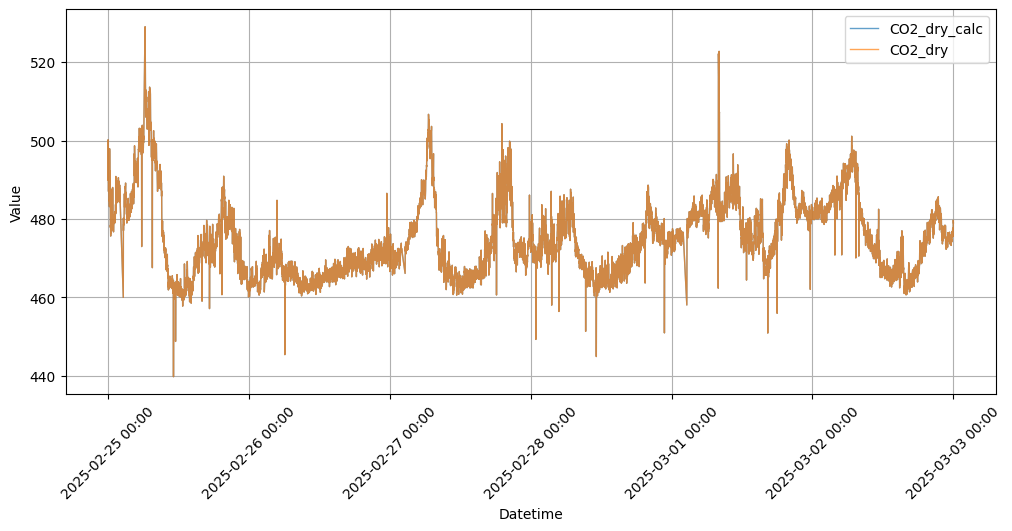

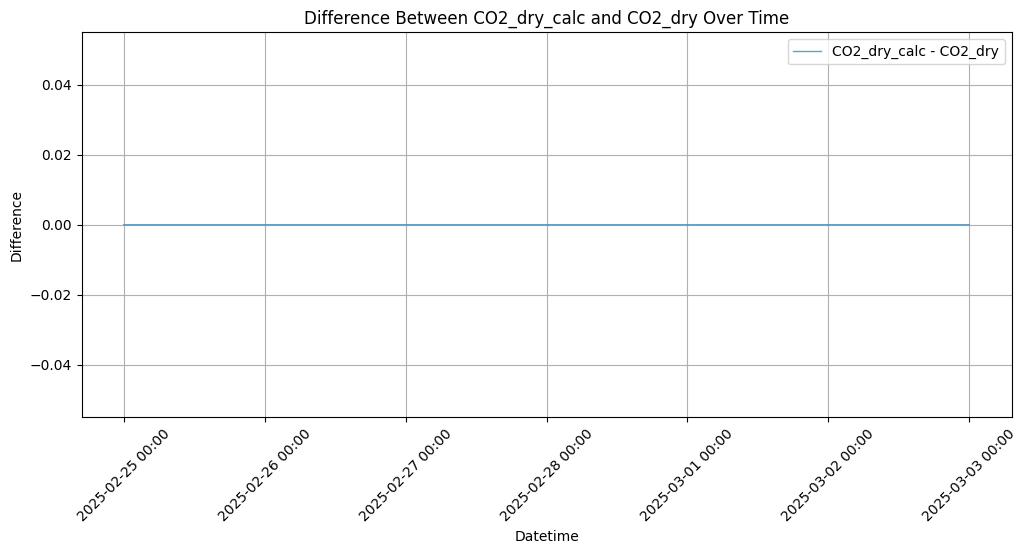

In [104]:
df_plot = df_dry.join(df_s.select(["datetime", "CO2_dry"]), on="datetime", how="left")

plot_columns(df_plot, "datetime", ["CO2_dry_calc", "CO2_dry"])
plot_column_difference(df_plot, "datetime", ["CO2_dry_calc", "CO2_dry"])

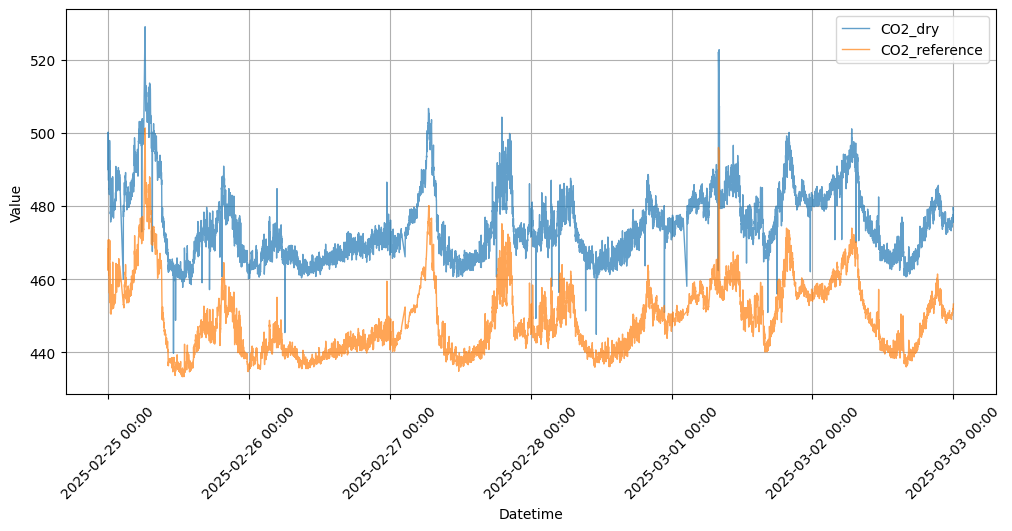

In [90]:
df_plot = df_dry.join(df_p, on="datetime", how="left")

plot_columns(df_plot, "datetime", ["CO2_dry", "CO2_reference"])

Something is still not quite right. Let's move on to the Notebook: 2_Calibration_Correction!